# Introduction to Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. [https://seaborn.pydata.org/]

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn

In [2]:
import seaborn as sns

In [3]:
print('Seaborn version: ',sns.__version__)

Seaborn version:  0.11.2


Advantages of Seaborn library:
- It is easy to use and requires less code syntax
- Works well with `pandas` data structures, which is just what you need as a data scientist.
- It is built on top of Matplotlib.

Loading an example dataset:

In [4]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


A countplot is a bar plot of counts of each unique value.

Suppose we want to know the distribution of sex variable. Specifying `x=tips.sex`, you get a verical bar chart.

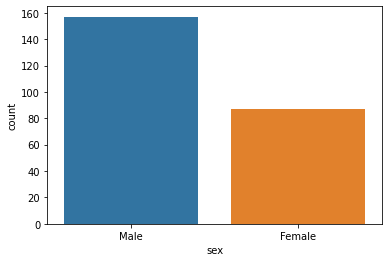

In [5]:
sns.countplot(x=tips.sex);

Specifying `y=tips.time`, you get a horizontal bar chart.

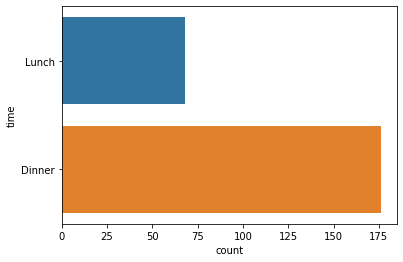

In [6]:
sns.countplot(y=tips.time);

`countplot()` has a parameter hue. Using it you can create a bar chart of two variables.

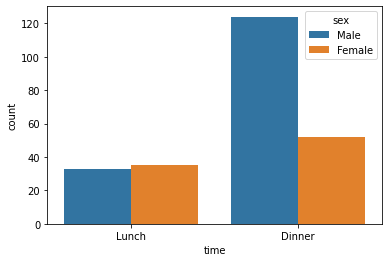

In [7]:
sns.countplot(x=tips.time, hue=tips.sex);

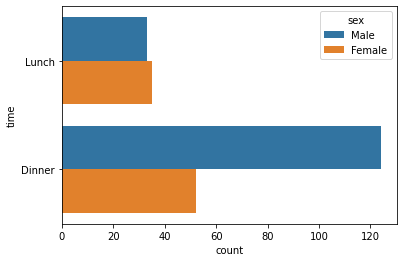

In [8]:
# Countplot with horizontal bars
sns.countplot(y=tips.time, hue=tips.sex);

You can specify `data=tips` (name of DataFrame), and then use only the column names for x or y.

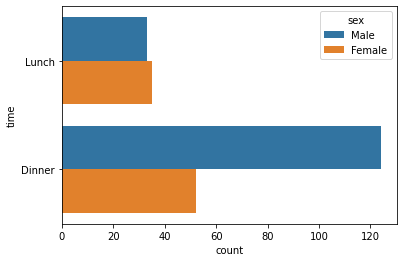

In [9]:
sns.countplot(data=tips, y='time', hue='sex');

`relplot()` function produces a scatter plot (or relationship plot) between two variables: x and y.

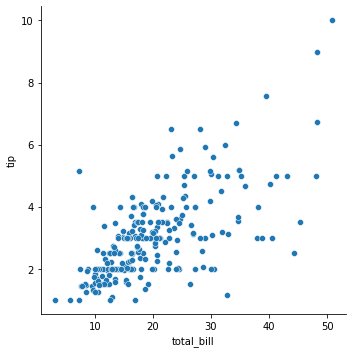

In [10]:
sns.relplot(data=tips, x="total_bill", y="tip");            

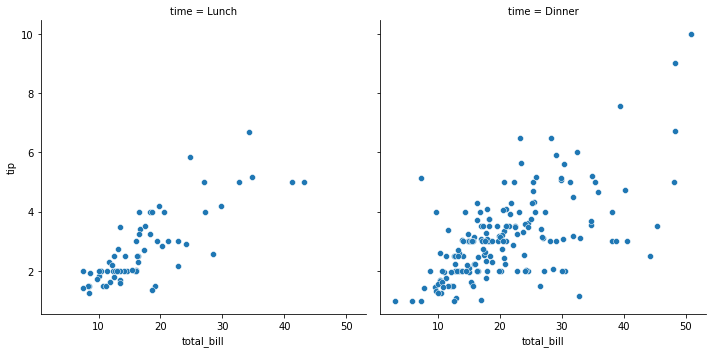

In [11]:
# Using the col parameter
sns.relplot(data=tips, x="total_bill", y="tip", 
            col="time");    

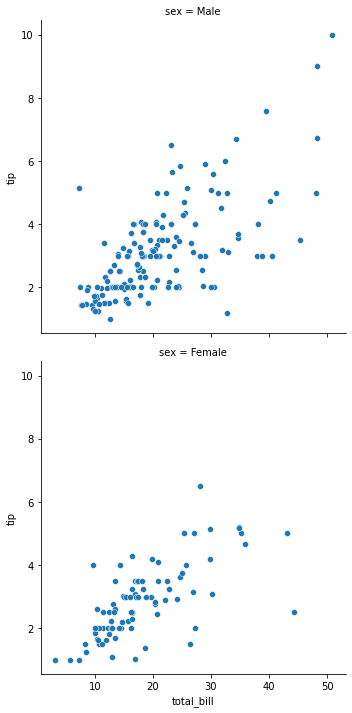

In [12]:
# Using the row parameter
sns.relplot(data=tips, x="total_bill", y="tip", 
            row="sex");   

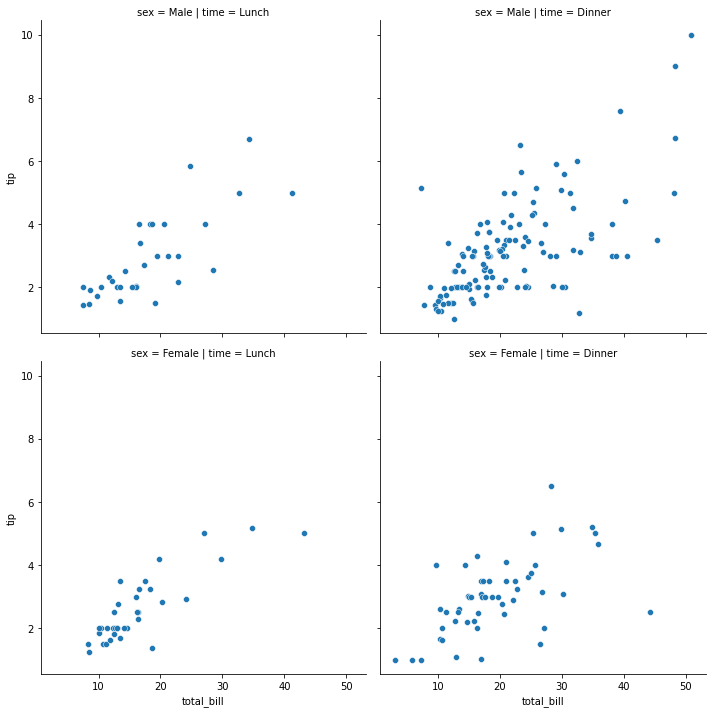

In [13]:
# Using both: row and col parameters
sns.relplot(data=tips, x="total_bill", y="tip", 
            col="time", row="sex");  

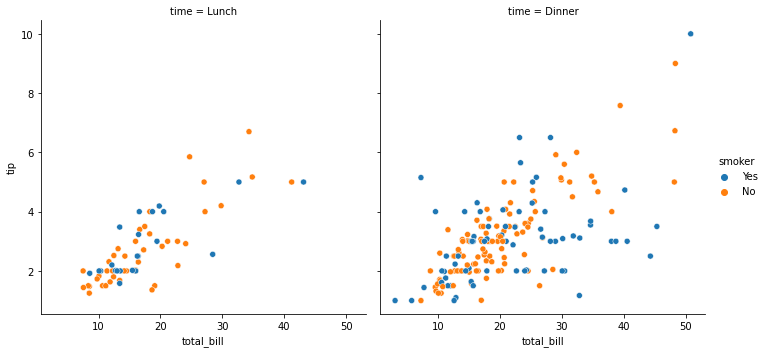

In [14]:
# Using the hue parameter
sns.relplot(data=tips, x="total_bill", y="tip", 
            col="time", hue="smoker");

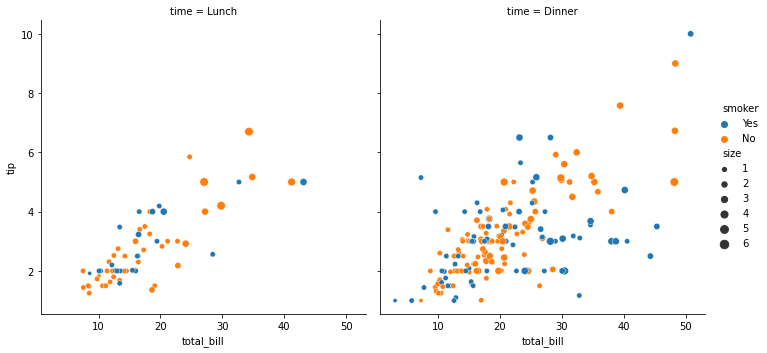

In [15]:
# Using the size parameter
sns.relplot(data=tips, 
            x="total_bill", y="tip", 
            col="time", hue="smoker", size="size");

This plot shows the relationship between several variables in the tips dataset using a single call to the seaborn function `relplot()`. 

We provided only the names of the variables and their roles in the plot.

## Distribution plots

A great way to explore a single numerical variable is with the histogram. 

A histogram divides the data into bins or intervals, counts the data points in each interval, and represents the bins and their frequency graphically.

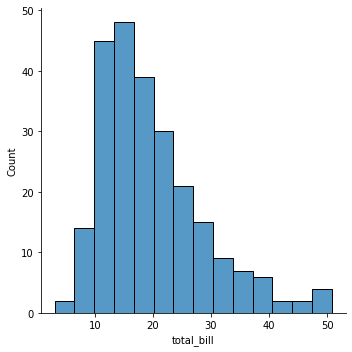

In [16]:
# This is a histogram of the numerical variable total_bill
sns.displot(data=tips, x="total_bill");

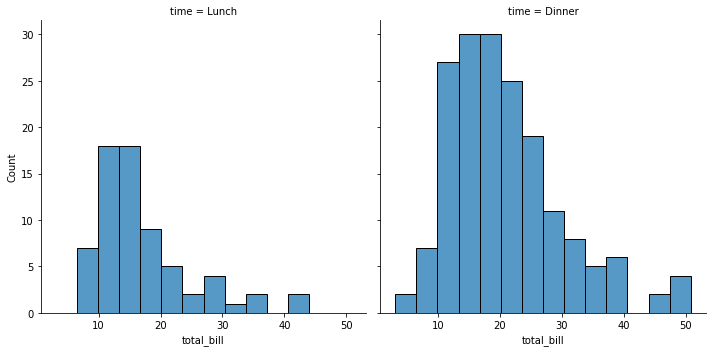

In [17]:
# Using the col parameter
sns.displot(data=tips, x="total_bill",
            col="time");

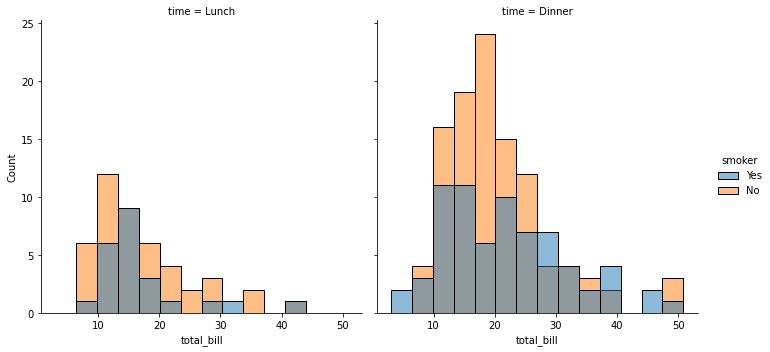

In [18]:
# # Using the col and hue parameters
sns.displot(data=tips, x="total_bill",
            col="time", hue="smoker");

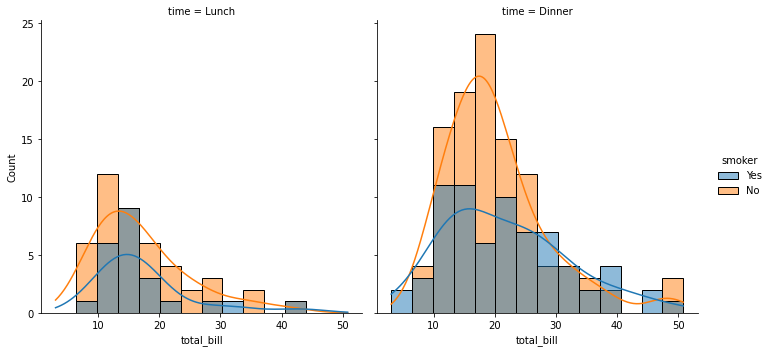

In [19]:
# Using kde=True (Kernel Density Estimation)
sns.displot(data=tips, x="total_bill",
            col="time", hue="smoker", kde=True);

We got a probability density graph by removing the parameters col and hue and changing the type to kind='kde'.

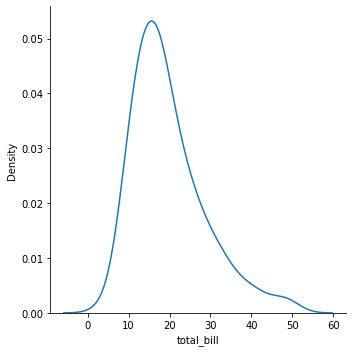

In [20]:
# density graph
sns.displot(data=tips, x="total_bill", kind='kde');

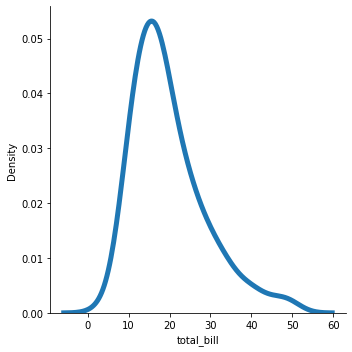

In [21]:
# Increasing the linewidth value
sns.displot(data=tips, x="total_bill", linewidth='5', kind='kde');

We can change the number of intervals (bins) of the histogram. 

Let's use `bins=30`, and return to `kde=True` to visualize the distribution curves.

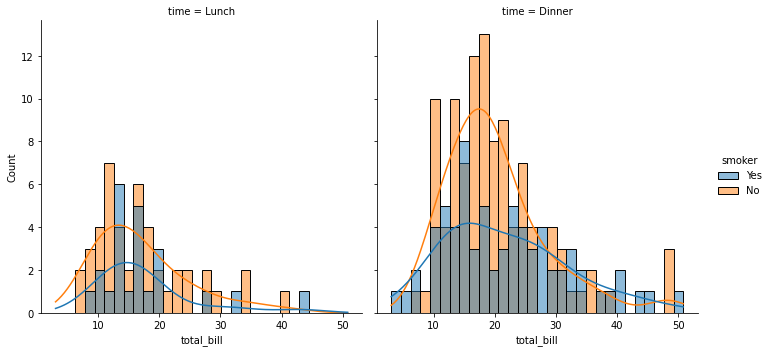

In [22]:
sns.displot(data=tips, x="total_bill", 
            col="time", hue="smoker", kde=True, bins=30);

We can remove the `bins` parameter, and change the graph to `kind='kde'`

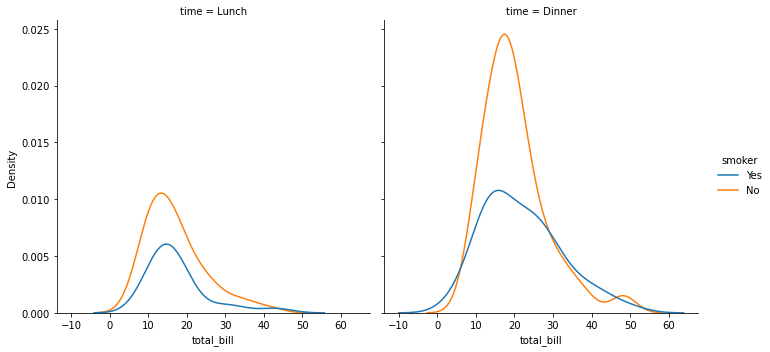

In [23]:
sns.displot(data=tips, x="total_bill", 
            col="time", hue="smoker", kind='kde');

`rug` plot adds a small tick on the edge of the plot to represent each individual observation. You can include them in a graph with the parameter `rug=True`.

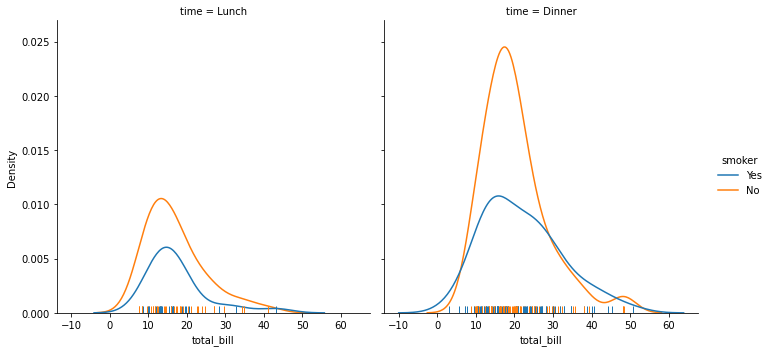

In [24]:
sns.displot(data=tips, x="total_bill", 
            col="time", hue="smoker", kind='kde', rug=True);

### Bivariate Distributions

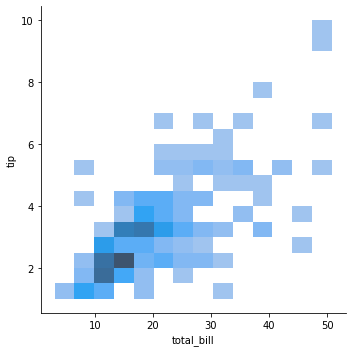

In [25]:
# Assigning a second numerical variable to y
sns.displot(data=tips, x="total_bill", y="tip");

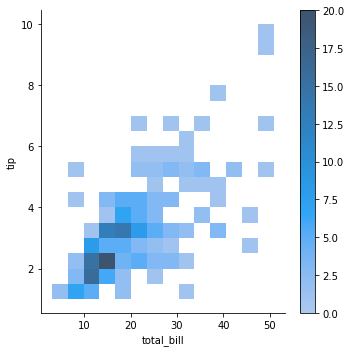

In [26]:
# Adding the parameter cbar=True
sns.displot(data=tips, x="total_bill", y="tip", cbar=True);

A bivariate histogram bins the data within rectangles that tile the plot and shows the count of observations within each rectangle with the fill color. 

A bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian. The default representation then shows the contours of the 2D density:

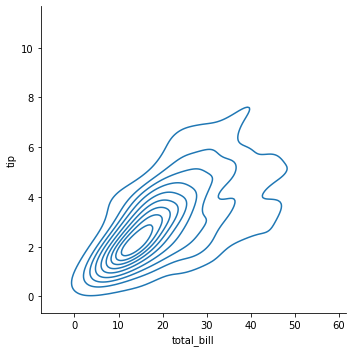

In [27]:
sns.displot(data=tips, x="total_bill", y="tip", kind='kde');

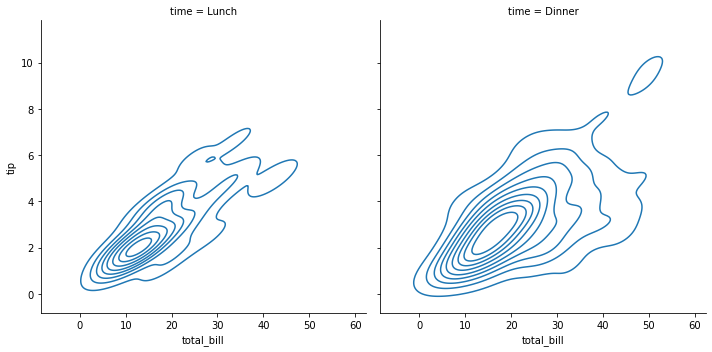

In [28]:
# Using the col parameter
sns.displot(data=tips, x="total_bill", y="tip", 
            col="time", kind='kde');

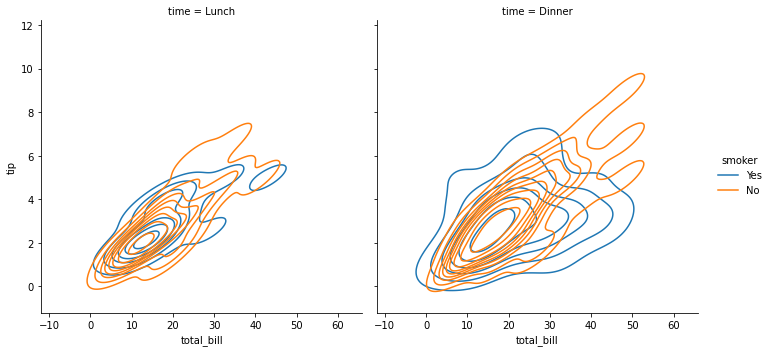

In [29]:
# Using the col and hue parameters
sns.displot(data=tips, x="total_bill", y="tip", 
            col="time", hue="smoker", kind='kde');

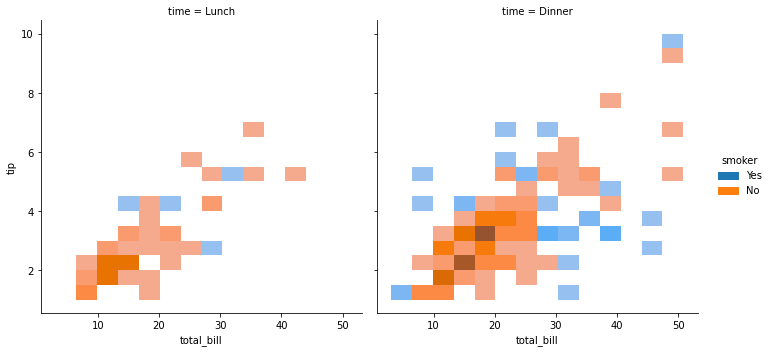

In [30]:
# Removing kind='kde'
sns.displot(data=tips, x="total_bill", y="tip", 
            col="time", hue="smoker");

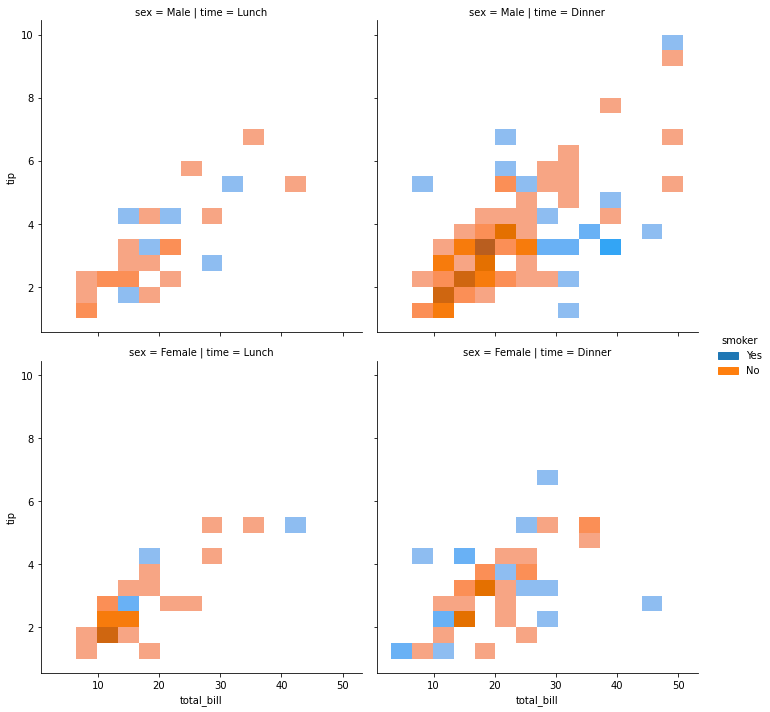

In [31]:
# Adding row='sex'
sns.displot(data=tips, x="total_bill", y="tip", 
            col="time", row='sex', hue="smoker");

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. 

`jointplot()` focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

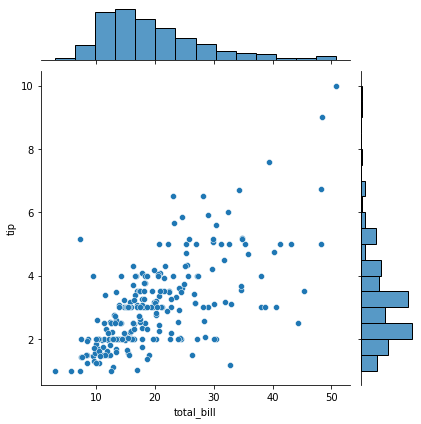

In [32]:
sns.jointplot(data=tips, x="total_bill", y="tip");

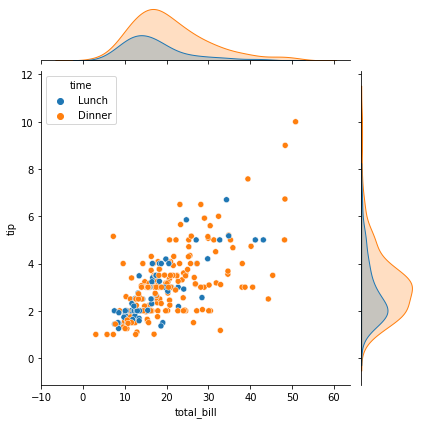

In [33]:
# Including the hue parameter
sns.jointplot(data=tips, x="total_bill", y="tip", hue="time");

`pairplot()`: takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable

In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
tips2 = tips[['total_bill', 'tip', 'time']]

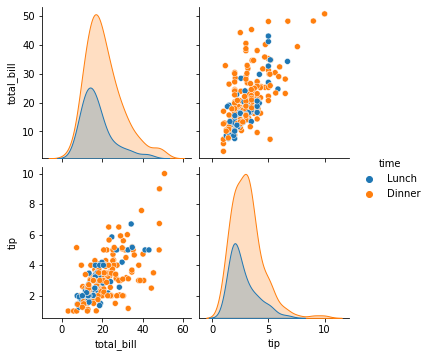

In [36]:
sns.pairplot(data=tips2, hue="time");

References:
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc. chapter 4